# Diamond Price Prediction Project

Importing libraries

In [87]:
# Data importing and data manupulation
import numpy as np # for doing math and data manupilation
import pandas as pd # handling dataframe and data manupilation

# Visualisation
import matplotlib as mpl #visualization library in Python for 2D plots of arrays
                         #generate plots, histograms, 
                         #power spectra, bar charts, 
                         #errorcharts, scatterplots, etc.

import matplotlib.pyplot as plt #functions provides a MATLAB-like plotting framework.                                
                                #creates a figure, creates a plotting area in a figure, 
                                #plots some lines in a plotting area, decorates the plot with labels, etc.

import matplotlib.pylab as pylab #pylab combines pyplot with numpy into a single namespace
import seaborn  as sns # seaborn is for statistical visualisation
import missingno as msno # ibrary offers a very nice way to visualize the distribution of NaN values.

#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder

# Modelling Algorithms

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet

# Modelling Helpers :
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score

#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

In [2]:
Diammonds = pd.read_csv("F:\\Imarticus\\kaggle\\diamond\\diamonds.csv")
df = Diammonds.copy()

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Features
*Carat : * Carat weight of the Diamond.

*Cut : * Describe cut quality of the diamond.
Quality in increasing order Fair, Good, Very Good, Premium, Ideal .

*Color : * Color of the Diamond.
With D being the best and J the worst.

*Clarity : * Diamond Clarity refers to the absence of the Inclusions and Blemishes.
(In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

*Depth : * The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.

*Table : * The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.

*Price : * the Price of the Diamond.

*X : * Length of the Diamond in mm.

*Y : * Width of the Diamond in mm.

*Z : * Height of the Diamond in mm.

*Qualitative Features (Categorical) : Cut, Color, Clarity. *

Quantitative Features (Numerical) : Carat, Depth , Table , Price , X , Y, Z.

In [4]:
col=df.columns
col

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [5]:
#from the data description we can conclude unwanted and target variable
print(col[0], ": unwanted ")
print(col[7], ": target variable ")

Unnamed: 0 : unwanted 
price : target variable 


# Dropping "Unnamed: 0"

In [6]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [7]:
# checking
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.shape

(53940, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# Exploring the missing values

In [10]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

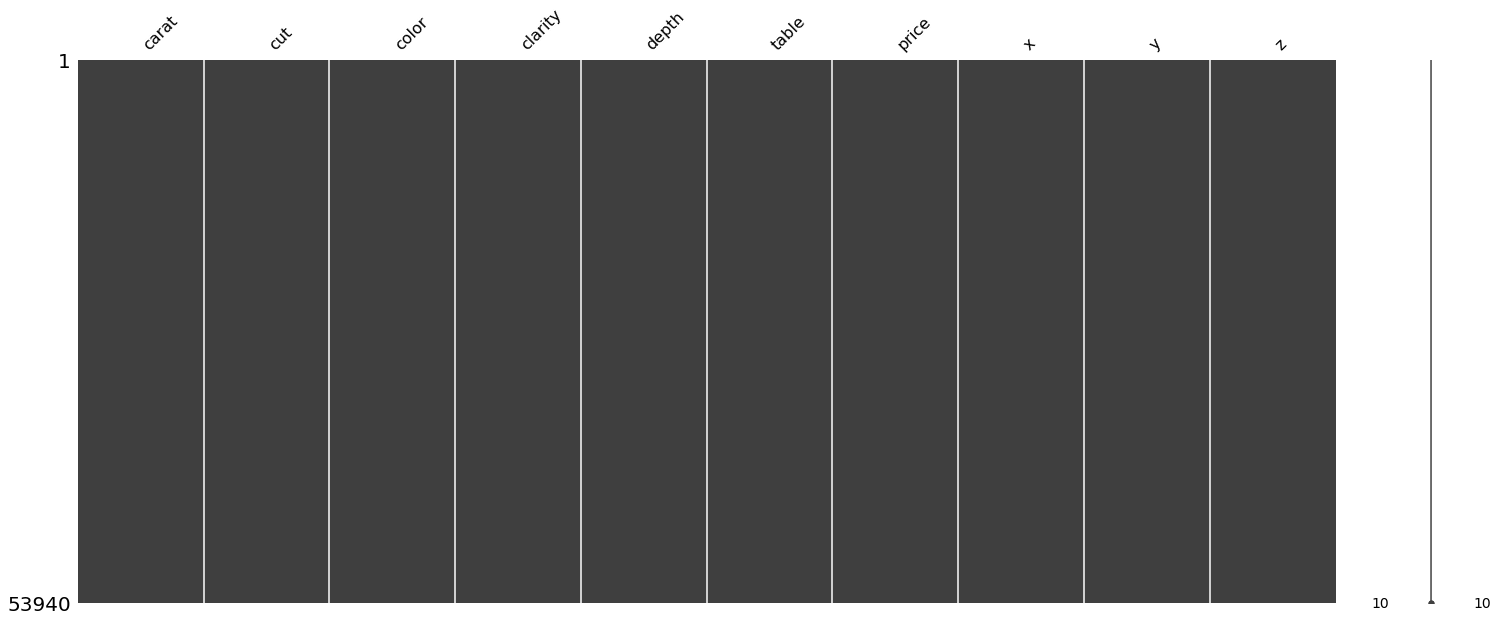

In [11]:
msno.matrix(df)

There is no null values

In [12]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


But when we look at the x, y and z variable, the min is 0. it cant be 0 because its a measurement of length, bredth and width.
so we have to treat the 0 values

In [13]:
# Filtering the data based on x=0, y=0 and z=0
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [14]:
len(df.loc[(df['x']==0) & (df['y']==0) & (df['z']==0)])

7

Extracting the index of the selected rows

In [15]:
df0 = df[(df['x']==0) | (df['y']==0) | (df['z']==0)].index
df0

Int64Index([ 2207,  2314,  4791,  5471, 10167, 11182, 11963, 13601, 15951,
            24394, 24520, 26123, 26243, 27112, 27429, 27503, 27739, 49556,
            49557, 51506],
           dtype='int64')

Droping the selected rows

In [16]:
df.drop(df0, inplace = True)

In [17]:
len(df[(df['x']==0) | (df['y']==0) | (df['z']==0)])

0

In [18]:
#checking the shape
df.shape
# the row number is reduced by 20

(53920, 10)

In [19]:
# creating a new column caled diamond_size

df["size"]=round(df["x"]*df["y"]*df["z"],2)

In [20]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.20
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.51
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.08
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.72
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.92


# Analysing the features

Univariate Analysis

Statistical methode

In [21]:
# Analysing continous variable
df.describe(include = "all")

,carat,cut,color,clarity,depth,table,price,x,y,z,size
count,53920.000000,53920,53920,53920,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21548,11284,13063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797698,NaN,NaN,NaN,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046,129.897585
std,0.473795,NaN,NaN,NaN,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530,78.219779
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,31.710000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,65.190000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.840000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000,170.850000


In [22]:
# Analysing catogorical Variable
print(df.cut.value_counts())
print(df.color.value_counts())
print(df.clarity.value_counts())

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64
G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64
SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016CC3FB2F60>,
      dtype=object)

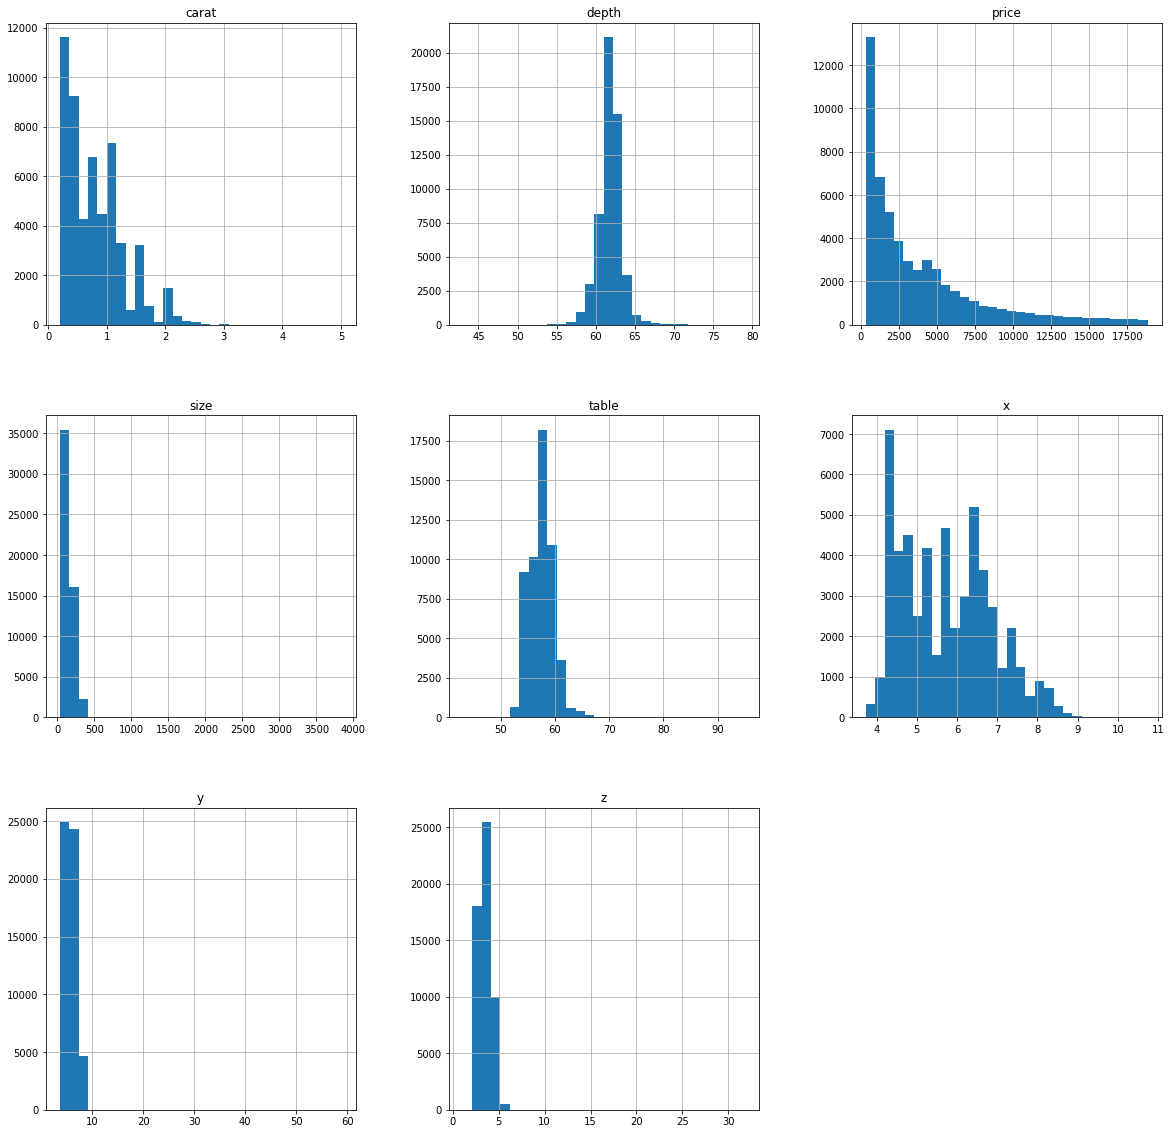

In [23]:
# Visualising the univariate
df.hist(figsize = (20,20),bins=30) # using matplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016CC2D0EF28>]],
      dtype=object)

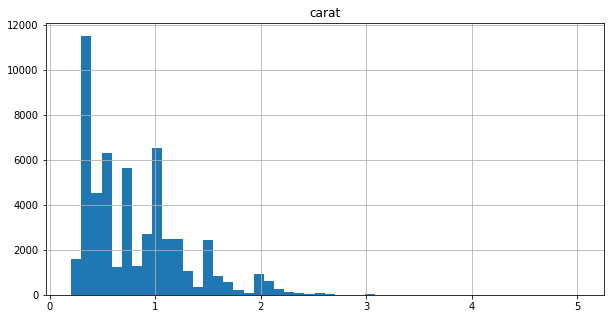

In [24]:
df.hist(column = "carat", figsize = (10,5), bins = 50)

from the graph, we can conclude that non of the features are not normally distributed, but we can also confirm this by statistical method called normality

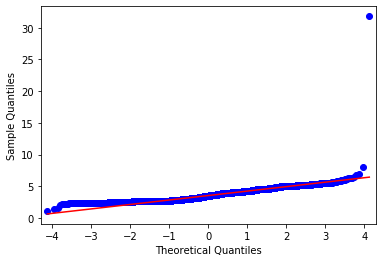

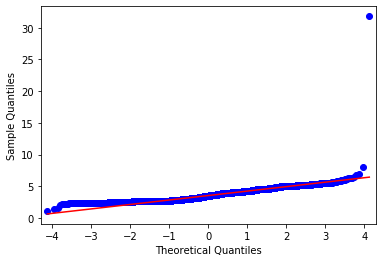

In [25]:
from statsmodels.graphics.gofplots import qqplot

qqplot(data = df["z"], line = "s")

In [26]:
from scipy.stats import kstest, normaltest

In [27]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'size'],
      dtype='object')

In [28]:

stat, p = kstest(df["carat"], "norm")
alpha = 0.05
if p > alpha:
    print("normally distributed")
else:
    print("not normally distributed")
    

not normally distributed


statistically it has been proved that the given data is not normally distributed. KS test is used to check. if the p value is less than alpha = 0.05, then the data is not normally distributed

the above test is wrong, the normality test should be calculated only for the residuals not for IDV

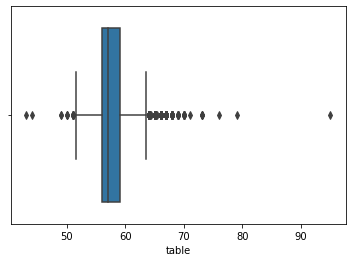

In [29]:
sns.boxplot(x = "table", data = df)

# Data Transformation

We create various data based on different data tranformation method

1. standard scalar

In [30]:
scalar = StandardScaler()
df[['carat','depth','x','y','z','table','size']]=scalar.fit_transform(df[['carat','depth','x','y','z','table','size']])

In [31]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,-1.198204,Ideal,E,SI2,-0.174203,-1.099725,326,-1.591573,-1.539219,-1.580084,-1.172318
1,-1.240417,Premium,E,SI1,-1.361090,1.585988,326,-1.645173,-1.662014,-1.750896,-1.219493
2,-1.198204,Good,E,VS1,-3.385781,3.376463,327,-1.502241,-1.460280,-1.750896,-1.173852
3,-1.071566,Premium,I,VS2,0.454149,0.243131,334,-1.368242,-1.319943,-1.295396,-1.063393
4,-1.029353,Good,J,SI2,1.082501,0.243131,335,-1.243176,-1.214690,-1.124583,-0.996913


# Encoding Categorical Features

In [32]:
df_label=df.copy()
df_label.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,-1.198204,Ideal,E,SI2,-0.174203,-1.099725,326,-1.591573,-1.539219,-1.580084,-1.172318
1,-1.240417,Premium,E,SI1,-1.361090,1.585988,326,-1.645173,-1.662014,-1.750896,-1.219493
2,-1.198204,Good,E,VS1,-3.385781,3.376463,327,-1.502241,-1.460280,-1.750896,-1.173852
3,-1.071566,Premium,I,VS2,0.454149,0.243131,334,-1.368242,-1.319943,-1.295396,-1.063393
4,-1.029353,Good,J,SI2,1.082501,0.243131,335,-1.243176,-1.214690,-1.124583,-0.996913


In [33]:
label = LabelEncoder()

df_label["cut"] = label.fit_transform(df_label['cut'])

In [34]:
df_label.head()
print(df_label["cut"].value_counts())

2    21548
3    13780
4    12081
1     4902
0     1609
Name: cut, dtype: int64


In [35]:
df_label['clarity'] = label.fit_transform(df_label['clarity'])

In [36]:
df_label.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,-1.198204,2,E,3,-0.174203,-1.099725,326,-1.591573,-1.539219,-1.580084,-1.172318
1,-1.240417,3,E,2,-1.361090,1.585988,326,-1.645173,-1.662014,-1.750896,-1.219493
2,-1.198204,1,E,4,-3.385781,3.376463,327,-1.502241,-1.460280,-1.750896,-1.173852
3,-1.071566,3,I,5,0.454149,0.243131,334,-1.368242,-1.319943,-1.295396,-1.063393
4,-1.029353,1,J,3,1.082501,0.243131,335,-1.243176,-1.214690,-1.124583,-0.996913


In [37]:
df_label["clarity"].value_counts()

2    13063
5    12254
3     9185
4     8170
7     5066
6     3654
1     1790
0      738
Name: clarity, dtype: int64

In [38]:
df_label["clarity"].value_counts()

2    13063
5    12254
3     9185
4     8170
7     5066
6     3654
1     1790
0      738
Name: clarity, dtype: int64

In [39]:
df_label["color"]=label.fit_transform(df_label["color"])

In [40]:
df_label["color"].value_counts()

3    11284
1     9797
2     9538
4     8298
0     6774
5     5421
6     2808
Name: color, dtype: int64

In [41]:
df_ohe = pd.get_dummies(df)
df_ohe.head()

,carat,depth,table,price,x,y,z,size,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198204,-0.174203,-1.099725,326,-1.591573,-1.539219,-1.580084,-1.172318,0,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.240417,-1.361090,1.585988,326,-1.645173,-1.662014,-1.750896,-1.219493,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.198204,-3.385781,3.376463,327,-1.502241,-1.460280,-1.750896,-1.173852,0,1,...,0,0,0,0,0,0,1,0,0,0
3,-1.071566,0.454149,0.243131,334,-1.368242,-1.319943,-1.295396,-1.063393,0,0,...,1,0,0,0,0,0,0,1,0,0
4,-1.029353,1.082501,0.243131,335,-1.243176,-1.214690,-1.124583,-0.996913,0,1,...,0,1,0,0,0,1,0,0,0,0


In [42]:
print(df_ohe.shape, df.shape)

(53920, 28) (53920, 11)


In [43]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [44]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [45]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [46]:
# label mapping
label_map={"clarity":{"FL":11, "IF":10, "VVS1":9, "VVS2":8, "VS1":7, "VS2":6, "SI1":5, "SI2":4, "I1":3, "I2":2, "I3":1},
          "color":{"D":7,"E":6,"F":5,"G":4,"H":3,"I":2,"J":1},
          "cut":{"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5}}


In [47]:
df_map=df.replace(label_map)

In [48]:
df_map[["cut","color","clarity"]]=df_map[["cut","color","clarity"]].astype("int64")

In [49]:
df_map.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 11 columns):
carat      53920 non-null float64
cut        53920 non-null int64
color      53920 non-null int64
clarity    53920 non-null int64
depth      53920 non-null float64
table      53920 non-null float64
price      53920 non-null int64
x          53920 non-null float64
y          53920 non-null float64
z          53920 non-null float64
size       53920 non-null float64
dtypes: float64(7), int64(4)
memory usage: 4.9 MB


in this data, feature y,z and table has the outlier in it. so we have to treat them

In [50]:
df_map.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,-1.198204,5,6,4,-0.174203,-1.099725,326,-1.591573,-1.539219,-1.580084,-1.172318
1,-1.240417,4,6,5,-1.361090,1.585988,326,-1.645173,-1.662014,-1.750896,-1.219493
2,-1.198204,2,6,7,-3.385781,3.376463,327,-1.502241,-1.460280,-1.750896,-1.173852
3,-1.071566,4,2,6,0.454149,0.243131,334,-1.368242,-1.319943,-1.295396,-1.063393
4,-1.029353,2,1,4,1.082501,0.243131,335,-1.243176,-1.214690,-1.124583,-0.996913


In [51]:
# from scipy import stats
# import numpy as np
# z = np.abs(stats.zscore(df.table))
# print(z)

In [52]:
# print(np.where(z>3))

2. Bivariate Analysis

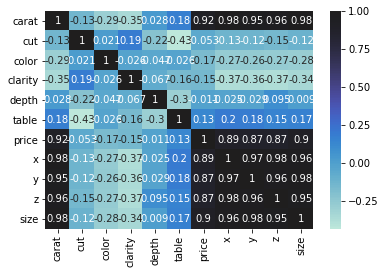

In [53]:
# continous vs continous
# correlation matrix
corr = df_map.corr()
sns.heatmap(data=corr,center=True, annot=True)

# CONCLUSIONS :
. Depth is inversely related to Price.

This is because if a Diamond's Depth percentage is too large or small the Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light.
2. The Price of the Diamond is highly correlated to Carat, and its Dimensions.

*3. The Weight (Carat) of a diamond has the most significant impact on its Price. *

Since, the larger a stone is, the Rarer it is, one 2 carat diamond will be more 'Expensive' than the total cost of two 1 Carat Diamonds of the same Quality.
4. The Length(x) , Width(y) and Height(z) seems to be higly related to Price and even each other.

5. Self Relation ie. of a feature to itself is 1 as expected.

6. Some other Inferences can also be drawn.

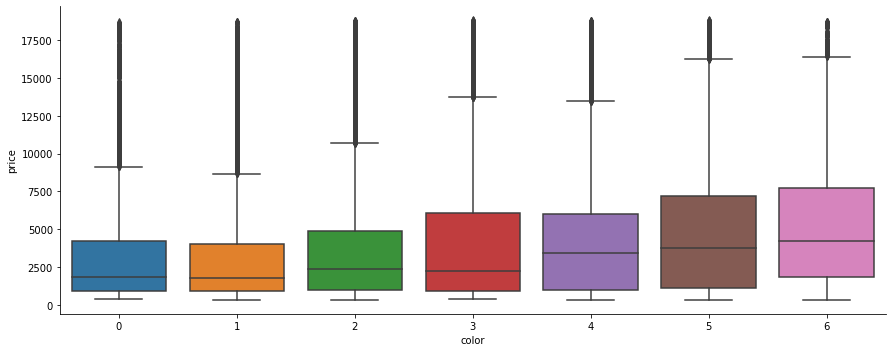

In [54]:
sns.factorplot(x='color', y='price', data=df_label , kind='box',aspect=2.5 )

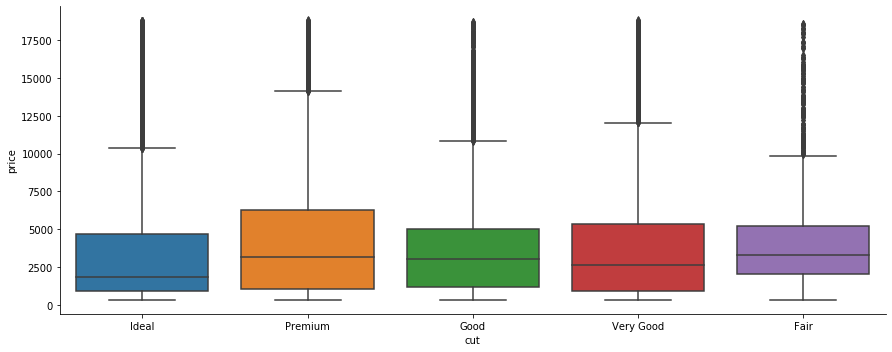

In [55]:
sns.factorplot(x='cut', y='price', data=df , kind='box',aspect=2.5 )

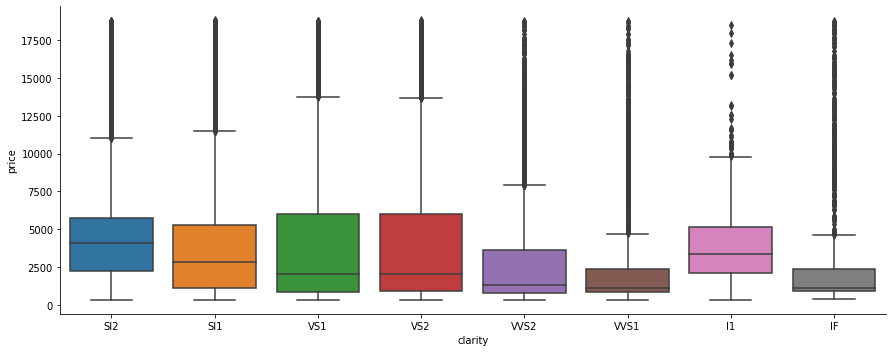

In [56]:
sns.factorplot(x='clarity', y='price', data=df , kind='box',aspect=2.5 )

In [57]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,-1.198204,Ideal,E,SI2,-0.174203,-1.099725,326,-1.591573,-1.539219,-1.580084,-1.172318
1,-1.240417,Premium,E,SI1,-1.361090,1.585988,326,-1.645173,-1.662014,-1.750896,-1.219493
2,-1.198204,Good,E,VS1,-3.385781,3.376463,327,-1.502241,-1.460280,-1.750896,-1.173852
3,-1.071566,Premium,I,VS2,0.454149,0.243131,334,-1.368242,-1.319943,-1.295396,-1.063393
4,-1.029353,Good,J,SI2,1.082501,0.243131,335,-1.243176,-1.214690,-1.124583,-0.996913


since the size and the crat feature is highly correlated, we do dimensionality reduction by pca, so that cart and size combine to form single pca component

Splitting the data

# PCA


In [58]:
from sklearn.decomposition import PCA

pca_model=PCA(n_components=1)

In [59]:
pca_values=pca_model.fit_transform(df[["carat","size"]])

In [60]:
pca_fea=pd.DataFrame(pca_values, columns=["pca"])
type(pca_fea)
pca_fea.reset_index(drop=True,inplace=True)

In [61]:
pca_fea.isna().sum()

pca    0
dtype: int64

In [62]:
df_drop_carat_size = df_map.drop(["carat","size","x","y","z"],axis=1)

In [63]:
df_drop_carat_size.reset_index(drop=True,inplace=True)

In [64]:
df_drop_carat_size.isna().sum()

cut        0
color      0
clarity    0
depth      0
table      0
price      0
dtype: int64

In [65]:
df_pca = pd.concat([df_drop_carat_size,pca_fea], axis =1)
print(df_pca.shape)
print(df_drop_carat_size.shape)
print(pca_fea.shape)

(53920, 7)
(53920, 6)
(53920, 1)


In [66]:
df_pca.isna().sum()

cut        0
color      0
clarity    0
depth      0
table      0
price      0
pca        0
dtype: int64

In [67]:
import statsmodels.api as sm
df_pca_cons=sm.add_constant(df_pca)

In [68]:
x = df_pca_cons.drop(["price","table","depth"], axis=1)
y = df_pca_cons['price']

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=66)
print("x shape:",x.shape,"y shape:", y.shape)
print("x_train shape:",x_train.shape,"y_train shape:", y_train.shape)
print("x_test shape:",x_test.shape,"y_test shape:",y_test.shape)

x shape: (53920, 5) y shape: (53920,)
x_train shape: (43136, 5) y_train shape: (43136,)
x_test shape: (10784, 5) y_test shape: (10784,)


# Model Building

In [73]:
R2_scores = []
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Ridge Regression' , 'GradientBoosting Regression',
          'RandomForest Regression' ,
         'KNeighbours Regression']

In [74]:
lr = LinearRegression()
lr.fit(x_train , y_train)
y_pred = lr.predict(x_test)
accuracy = cross_val_score(estimator = lr, X = x_test, y = y_test, cv = 2,verbose = 1)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test,y_pred)
print("Accuracy :" ,accuracy)
print("mse :", mse)
print("mae :", mae)
print("rmse:", rmse)
print("r2 :", r2)

R2_scores.append(r2)

Accuracy : [0.9088956  0.90367886]
mse : 1518720.36881408
mae : 846.5761757285767
rmse: 1232.363732350997
r2 : 0.9057905554452144


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


In [84]:
la = Lasso(normalize=True)
la.fit(x_train , y_train)
accuracies = cross_val_score(estimator = clf_la, X = x_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_la.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print("Accuracy :" ,accuracy)
print("mse :", mse)
print("mae :", mae)
print("rmse:", rmse)
print("r2 :", r2)

R2_scores.append(r2)

Accuracy : [0.9088956  0.90367886]
mse : 1832704.3681555197
mae : 839.1751007910173
rmse: 1353.7741200641708
r2 : 0.886313462239343


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [88]:
abr = RidgeCV(normalize=True)
abr.fit(x_train , y_train)
accuracies = cross_val_score(estimator = clf_la, X = x_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_la.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)
print("Accuracy :" ,accuracy)
print("mse :", mse)
print("mae :", mae)
print("rmse:", rmse)
print("r2 :", r2)

R2_scores.append(r2)

Accuracy : [0.9088956  0.90367886]
mse : 1832704.3681555197
mae : 839.1751007910173
rmse: 1353.7741200641708
r2 : 0.886313462239343


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [ ]:
#Checking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def to_get_vif(a):
    vif = [variance_inflation_factor(a.values,i) for i in range(a.values.shape[1])]
    vif_factors=pd.DataFrame()
    vif_factors["column"]=a.columns
    vif_factors["VIF"]=vif
    return vif_factors

In [ ]:
multicol_columns = []
new_feature = list(set(x_feature)-set(multicol_columns))

In [ ]:
to_get_vif(x)

here among 7 feature 6 features shows vif more than 4. so ther is multicollinearity in the data


so finding out the correlation between the features which has vif less than 4

In [ ]:
columns_with_high_vif = vif_factors[vif_factors.VIF>4].column
columns_with_high_vif

In [ ]:
sns.heatmap(x[["cut","clarity"]].corr(), annot=True, center=True, square=True)

from the correlation heatmap carat is correlated with x,y,z
x is correlated with y,z
y is correlated with z

since x,y,z is highly correlated we do feature engineer.

that is x,y and z are lenth, breath and width we could convert this to volume

After feature engineering the size has correlation with carat

# Residual analysis

In [ ]:

sm.ProbPlot(ols_model.resid)
plt.figure(figsize=(8,6))
plt.show()


In [89]:
from statsmodels.graphics.gofplots import qqplot

qqplot(data = lr.resid, line = "s")

AttributeError: 'LinearRegression' object has no attribute 'resid'

In [ ]:
ols_model.resid.mean()

since the dots are closer to the line the residuals are normally distributed

# Testing homoscedasticity

In [ ]:
sns.scatter(x=ols_model.resid, y = )

# cross validation and tuning the model

In [ ]:
sm.OLS()